In [54]:
import numpy as np
import matplotlib.pyplot as plt

## 1D case

In [55]:
# generate function
def function1(a, b, x):
    return a*x/(b+x)

f1 = function1

In [56]:
# generate data from real model y = 2x/(3+x)
x = np.linspace(0, 5, 50)
y = f1(2,3,x) + np.random.normal(0, 0.1, size=50)

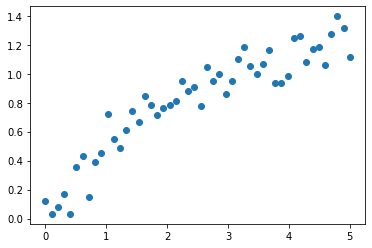

In [57]:
plt.scatter(x,y)

In [58]:
def Jacobian(f, a, b, x):
    eps = 1e-6
    grad_a = (f(a + eps, b, x) - f(a - eps, b, x))/(2*eps)
    grad_b = (f(a, b + eps, x) - f(a, b - eps, x))/(2*eps)
    return np.column_stack([grad_a, grad_b])

In [59]:
def Gauss_Newton(f, x, y, a0, b0, tol, max_iter):
    old = new = np.array([a0, b0])
    for itr in range(max_iter):
        old = new
        J = Jacobian(f, old[0], old[1], x)
        dy = y - f(old[0], old[1], x)
        new = old + np.linalg.inv(J.T@J)@J.T@dy
        if np.linalg.norm(old-new) < tol:
            break
    return new

In [60]:
a, b = Gauss_Newton(f1, x, y, 5, 1, 1e-5, 10)

In [61]:
y_hat = f1(a,b,x)

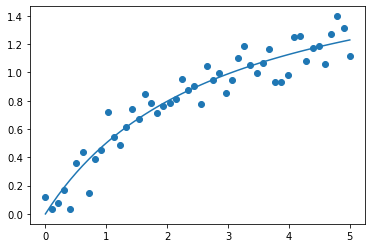

In [62]:
plt.scatter(x, y)
plt.plot(x, y_hat)

In [63]:
def function2(a, b, x):
    return (1/np.sqrt(2*np.pi*b))*np.exp(-0.5*(1/b)*(x-a)**2)

f2 = function2

In [64]:
y = f2(2.5,0.5,x) + np.random.normal(0, 0.01, size=50)

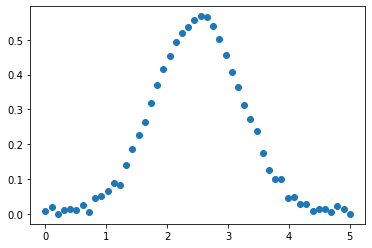

In [65]:
plt.scatter(x,y)

In [66]:
a, b = Gauss_Newton(f2, x, y, 3, 1, 1e-5, 10)
y_hat = f2(a,b,x)

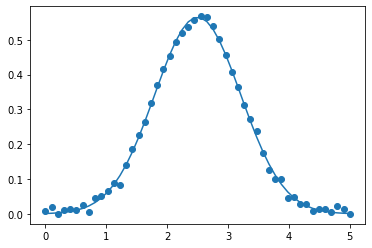

In [67]:
plt.scatter(x, y)
plt.plot(x, y_hat)

## 2D case

In [74]:
def function3(a, b, X):
    return a - (1/b)*X[:,0]**2-X[:,1]**2
    # return np.power(X[:,0],2)/2+(5*np.power((X[:,1]-np.power(X[:,0],2)),2))/2+np.power(X[:,1],2)/2;
f3 = function3

In [75]:
# generate data from real model
x1 = np.linspace(-5, 5, 50)
x2 = np.linspace(-5, 5, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack([X1.ravel(),X2.ravel()])
y = f3(5,4,X) + np.random.normal(0, 1, size=len(X))

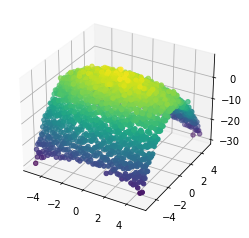

In [76]:
# %matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c = y, marker='o')

In [77]:
a, b = Gauss_Newton(f3, X, y, 3, 1, 1e-5, 10)
y_hat = f3(a, b, X)

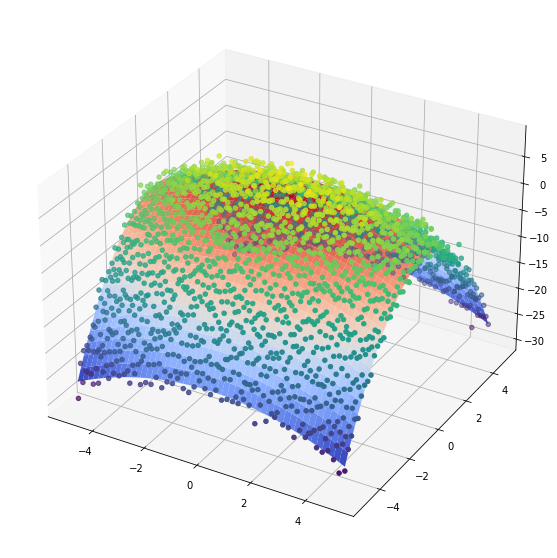

In [78]:
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X[:,0].reshape(50,50), X[:,1].reshape(50,50), y_hat.reshape(50,50), cmap=cm.coolwarm)
ax.scatter(X[:,0], X[:,1], y, c = y, marker='o')

## More general Jacobian

In [79]:
def Jacobian(f, b, x):
    eps = 1e-6
    grads = []
    for i in range(len(b)):
        t = np.zeros_like(b).astype(float)
        t[i] = t[i] + eps
        grad = (f(b + t, x) - f(b - t, x))/(2*eps)
        grads.append(grad)
    return np.column_stack(grads)

In [80]:
def Gauss_Newton(f, x, y, b0, tol, max_iter):
    old = new = b0
    for itr in range(max_iter):
        old = new
        J = Jacobian(f, old, x)
        dy = y - f(old, x)
        new = old + np.linalg.inv(J.T@J)@J.T@dy
        if np.linalg.norm(old-new) < tol:
            break
    return new

In [81]:
def function4(b, X):
    return b[0] - (1/b[1])*X[:,0]**2-(1/b[2])*X[:,1]**2

f4 = function4

In [82]:
bs = Gauss_Newton(f4, X, y, np.array([3, 1, 1]), 1e-5, 10)
bs

array([5.06483084, 4.02395616, 0.9946943 ])

## SciPy

In [83]:
from scipy.optimize import least_squares

def func(b, X, y):
    return f4(b, X) - y  

In [84]:
res = least_squares(func, np.array([3, 1, 1]), args=(X,y))

In [85]:
res.x

array([5.06483084, 4.02395616, 0.9946943 ])